<a href="https://colab.research.google.com/github/GaborVxxx/ml_notes/blob/main/LatentDirichletAllocation(LDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
stops = set(stopwords.words('english')) # unique item list

In [47]:
stops = stops.union({'said', 'would', 'could', 'told', 'also', 'one', 'two', 'mr', 'new', 'year'}) # extend the stop words list

In [48]:
# Convert the set to a list
stops = list(stops)

In [49]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [50]:
vectorizer = CountVectorizer(stop_words=stops)

In [51]:
X = vectorizer.fit_transform(df['text'])

In [52]:
lda = LatentDirichletAllocation(n_components=10, random_state=1234)

In [53]:
lda.fit(X)

LatentDirichletAllocation(random_state=1234)

In [54]:
def plot_top_words(model, feature_names, n_top_words = 10):

    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}', fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle('LAD', fontsize=40)

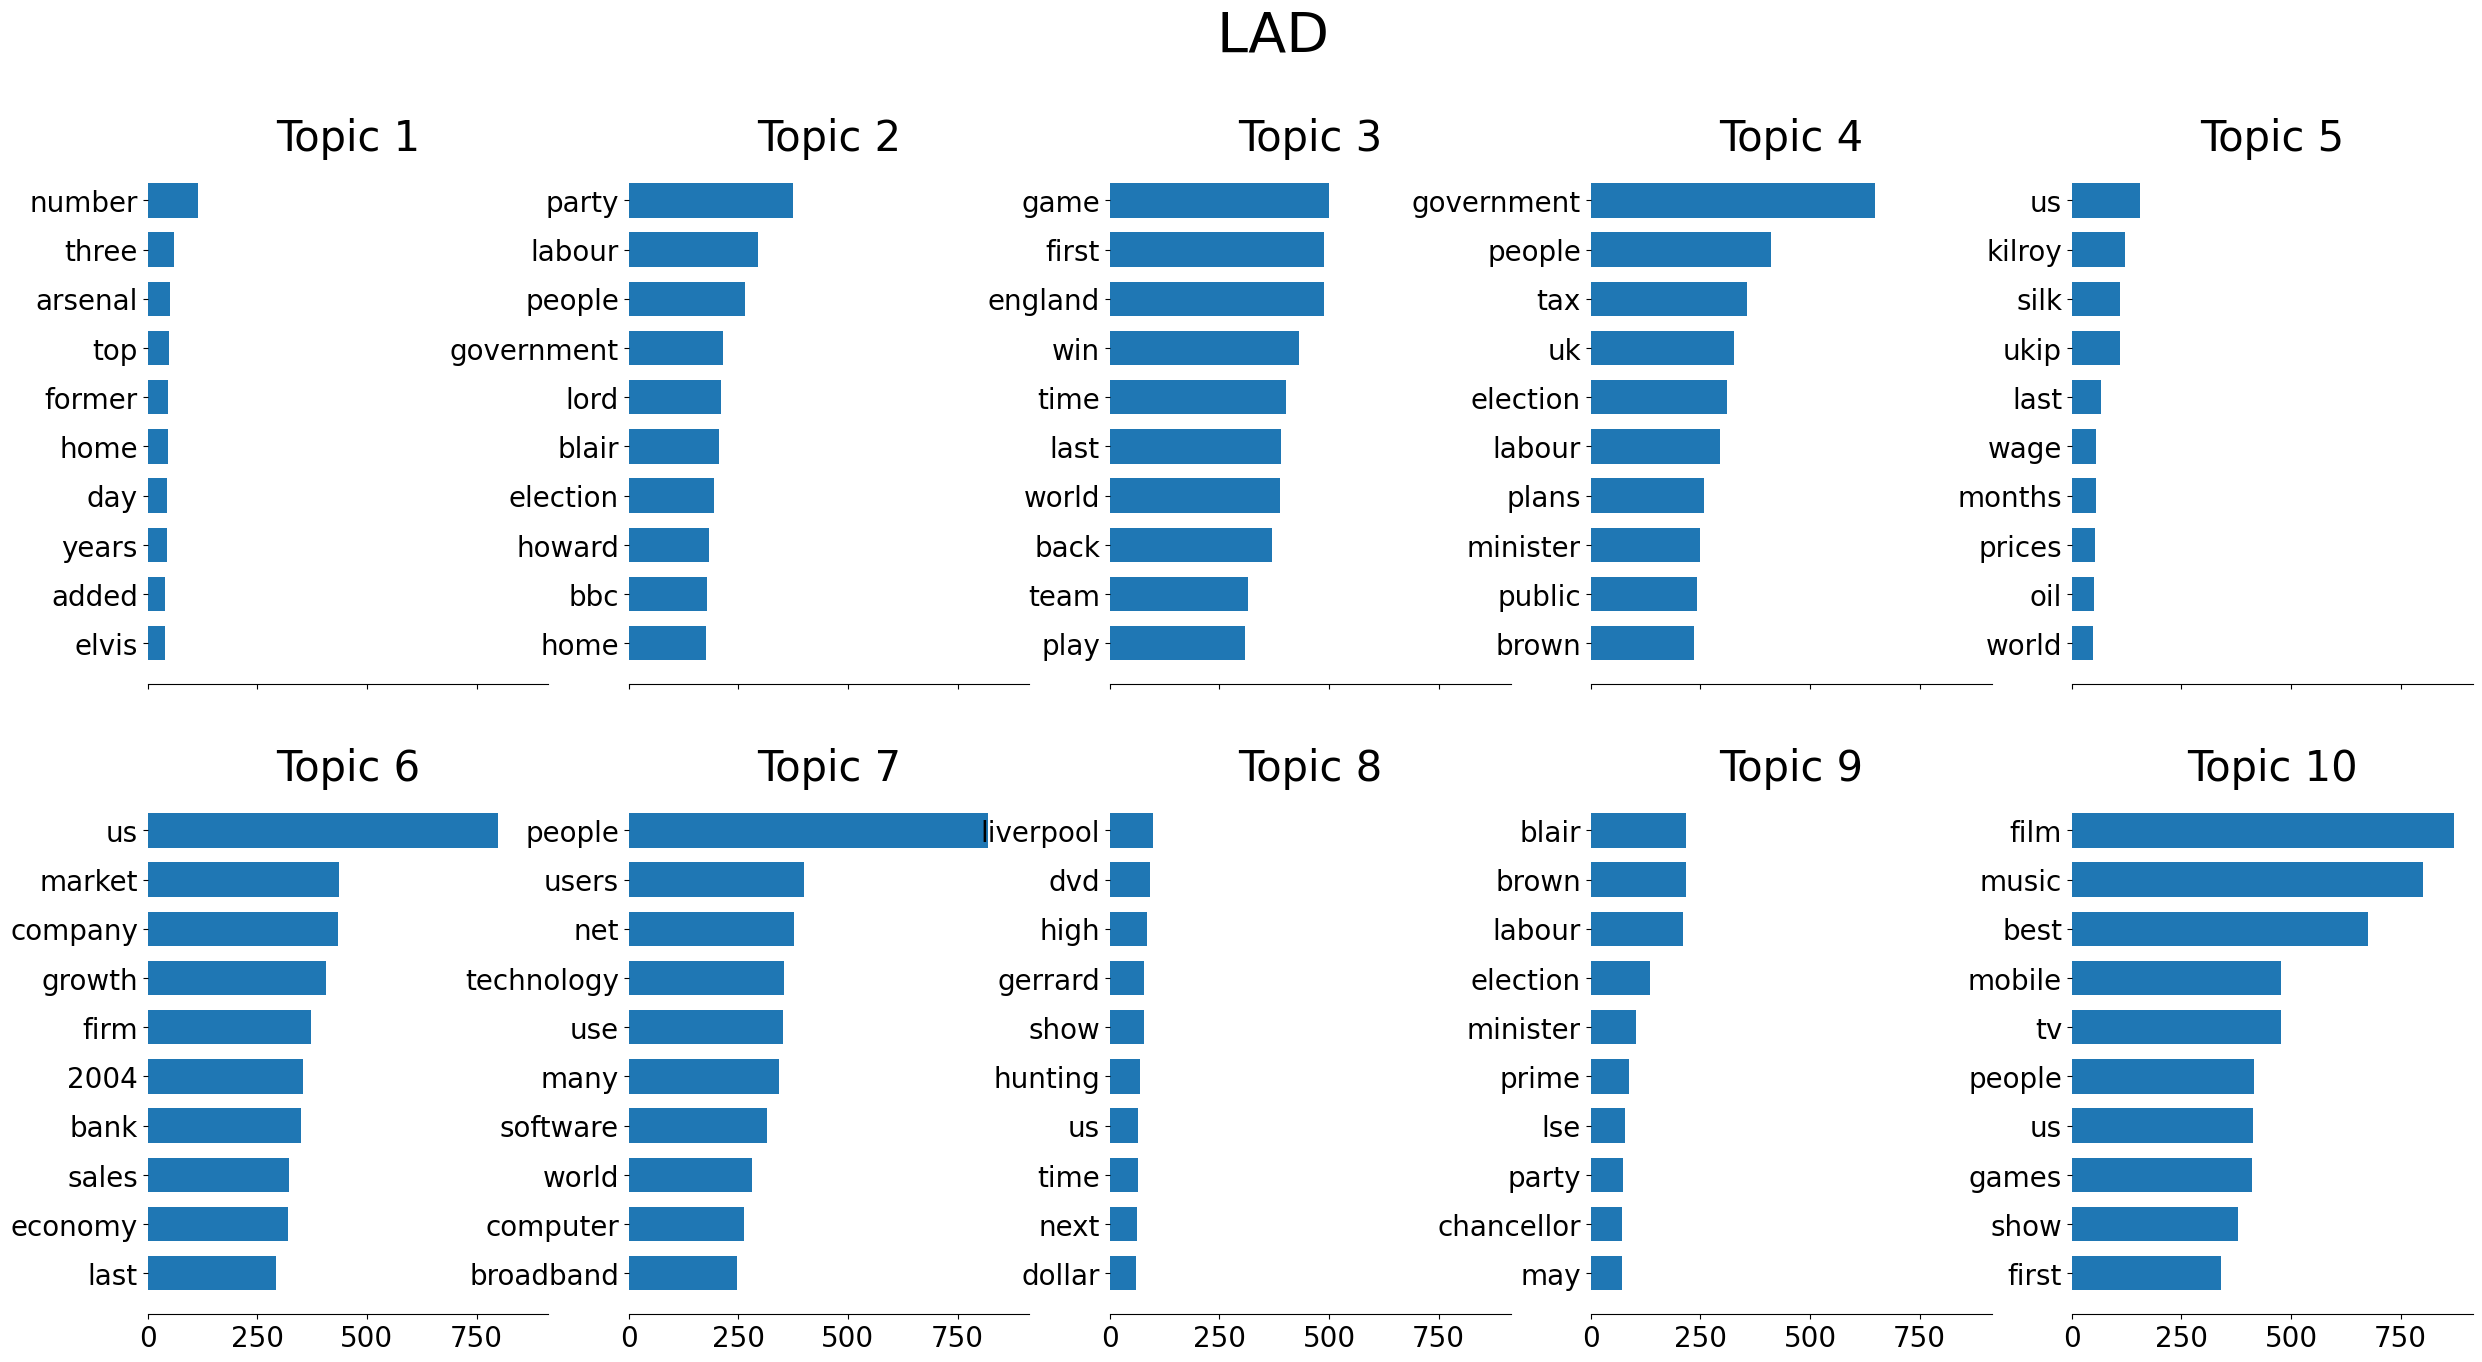

In [55]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, feature_names)

In [56]:
Z = lda.transform(X)

Charvis set to lose fitness bid

Flanker Colin Charvis is unlikely to play any part in Wales' final two games of the Six Nations.

Charvis has missed all three of Wales' victories with an ankle injury and his recovery has been slower than expected. "He will not figure in the Scotland game and is now thought unlikely to be ready for the final game," said Wales physio Mark Davies. Sonny Parker is continuing to struggle with a neck injury, but Hal Luscombe should be fit for the Murrayfield trip. Centre Parker has only a "slim chance" of being involved against the Scots on 13 March, so Luscombe's return to fitness after missing the France match with hamstring trouble is a timely boost.

Said Wales assistant coach Scott Johnson: "We're positive about Hal and hope he'll be raring to go. "He comes back into the mix again, adds to the depth and gives us other options. " Replacement hooker Robin McBryde remains a doubt after picking up knee ligament damage in Paris last Saturday. "We're getting

Text(0.5, 1.0, 'True label: sport')

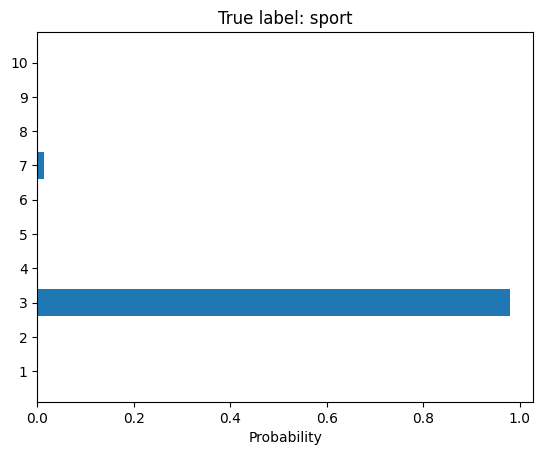

In [60]:
# Pick a random document
# check which "topics" are associated with it
# Are they related to the true label?

np.random.seed(0)
i = np.random.choice(len(df))
z = Z[i]
print(df.iloc[i]['text'])
print(textwrap.fill(df.iloc[i]['text']))
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_xlabel('Probability')
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['labels'])